In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Section 1 a

### 1 Pre-processing for Feature Selection

Refer to __[Feature Selection with Sklearn](https://scikit-learn.org/stable/modules/feature_selection.html)__ for more details of any operation on Numpy array objects.

#### a. Checking data types

In [7]:
# from google.colab import drive

# drive.mount('/content/drive')
# drive_path = '/content/drive/MyDrive/rep_Python/Shared_with_learners/Datasets/'
# data1 = pd.read_excel(drive_path + 'Housing.xlsx')

data1 = pd.read_excel('Housing.xlsx')
data1

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000,5850,3.0,1,2,yes,no,yes,no,no,1,no
1,2,38500,4000,2.0,1,1,yes,no,no,no,no,0,no
2,3,49500,3060,3.0,1,1,NaN,no,no,no,no,0,no
3,4,60500,6650,NaN,1,2,NaN,yes,no,no,no,0,no
4,5,61000,6360,NaN,1,1,NaN,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,542,91500,4800,3.0,2,4,yes,yes,no,no,yes,0,no
542,543,94000,6000,3.0,2,4,yes,no,no,no,yes,0,no
543,544,103000,6000,3.0,2,4,yes,yes,no,no,yes,1,no
544,545,105000,6000,3.0,2,2,yes,yes,no,no,yes,1,no


In [9]:
data1.info()
data1.price.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  546 non-null    int64  
 1   price       546 non-null    int64  
 2   lotsize     546 non-null    int64  
 3   bedrooms    538 non-null    float64
 4   bathrms     546 non-null    int64  
 5   stories     546 non-null    int64  
 6   driveway    537 non-null    object 
 7   recroom     546 non-null    object 
 8   fullbase    546 non-null    object 
 9   gashw       536 non-null    object 
 10  airco       546 non-null    object 
 11  garagepl    546 non-null    int64  
 12  prefarea    546 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 55.6+ KB


array([ 42000,  38500,  49500,  60500,  61000,  66000,  69000,  83800,
        88500,  90000,  30500,  27000,  36000,  37000,  37900,  40500,
        40750,  45000,  48500,  65900,  38000,  42300,  43500,  44000,
        44500,  44900,  48000,  49000,  51500,  61700,  67000,  82000,
        54500,  66500,  70000,  92000,  41000,  43000,  54800,  55000,
        57000,  68000,  95000,  25000,  25245,  56000,  35500,  30000,
        52000,  54000,  60000,  47000,  51000,  32500,  34000,  35000,
        63900,  50000,  55500,  78000,  58000, 163000, 128000, 123500,
        39000,  53900,  59900,  79000, 125000, 132000,  58500,  73000,
        63500,  46500,  75000,  85000,  93000,  94500, 106500, 116000,
        61500,  80000,  59500, 117000, 122500, 127000,  49900,  50500,
        65000,  46000,  26500,  40000,  57250,  62000,  63000, 130000,
        52900,  73500,  52500,  32000,  57500,  69900,  74500,  28000,
        44700,  33000,  34400,  53000,  69500,  72000,  92500,  47900,
      

#### b. Checking Duplicates

In [12]:
### Remove Rows if there are duplicates
data1.duplicated()
print(data1[ data1.duplicated() ])
data1.drop_duplicates(inplace = True)
# print(data1.shape)

data1.tail()

Empty DataFrame
Columns: [Unnamed: 0, price, lotsize, bedrooms, bathrms, stories, driveway, recroom, fullbase, gashw, airco, garagepl, prefarea]
Index: []


,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
541,542,91500,4800,3.0,2,4,yes,yes,no,no,yes,0,no
542,543,94000,6000,3.0,2,4,yes,no,no,no,yes,0,no
543,544,103000,6000,3.0,2,4,yes,yes,no,no,yes,1,no
544,545,105000,6000,3.0,2,2,yes,yes,no,no,yes,1,no
545,546,105000,6000,3.0,1,2,yes,no,no,no,yes,1,no


In [13]:
print(data1.shape)

(546, 13)


#### c. Handle missing values

In [17]:
### Remove Rows with NaN values 
data1.dropna(inplace = True)
print(data1.shape)

(530, 13)


In [18]:
data1.tail()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
541,542,91500,4800,3.0,2,4,yes,yes,no,no,yes,0,no
542,543,94000,6000,3.0,2,4,yes,no,no,no,yes,0,no
543,544,103000,6000,3.0,2,4,yes,yes,no,no,yes,1,no
544,545,105000,6000,3.0,2,2,yes,yes,no,no,yes,1,no
545,546,105000,6000,3.0,1,2,yes,no,no,no,yes,1,no


In [19]:
data1.reset_index(inplace = True)
print(data1.shape)
data1.tail()

(530, 14)


,index,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
525,541,542,91500,4800,3.0,2,4,yes,yes,no,no,yes,0,no
526,542,543,94000,6000,3.0,2,4,yes,no,no,no,yes,0,no
527,543,544,103000,6000,3.0,2,4,yes,yes,no,no,yes,1,no
528,544,545,105000,6000,3.0,2,2,yes,yes,no,no,yes,1,no
529,545,546,105000,6000,3.0,1,2,yes,no,no,no,yes,1,no


In [20]:
### Remove first two columns
data1.drop(data1.columns[0:2],inplace = True, axis=1)
print(data1.tail())

      price  lotsize  bedrooms  bathrms  stories driveway recroom fullbase  \
525   91500     4800       3.0        2        4      yes     yes       no   
526   94000     6000       3.0        2        4      yes      no       no   
527  103000     6000       3.0        2        4      yes     yes       no   
528  105000     6000       3.0        2        2      yes     yes       no   
529  105000     6000       3.0        1        2      yes      no       no   

    gashw airco  garagepl prefarea  
525    no   yes         0       no  
526    no   yes         0       no  
527    no   yes         1       no  
528    no   yes         1       no  
529    no   yes         1       no  


In [22]:
print(data1.shape)
data1.info()

(530, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     530 non-null    int64  
 1   lotsize   530 non-null    int64  
 2   bedrooms  530 non-null    float64
 3   bathrms   530 non-null    int64  
 4   stories   530 non-null    int64  
 5   driveway  530 non-null    object 
 6   recroom   530 non-null    object 
 7   fullbase  530 non-null    object 
 8   gashw     530 non-null    object 
 9   airco     530 non-null    object 
 10  garagepl  530 non-null    int64  
 11  prefarea  530 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 49.8+ KB


#### d. Data Encoding

In [28]:
### Convert object types here to category ['driveway', 'recroom', 'fullbase', 'gashw', 'airco','prefarea']
list_str_obj_cols = data1.columns[data1.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    data1[str_obj_col] = data1[str_obj_col].astype("category")
data1.dtypes

price          int64
lotsize        int64
bedrooms     float64
bathrms        int64
stories        int64
driveway    category
recroom     category
fullbase    category
gashw       category
airco       category
garagepl       int64
prefarea    category
dtype: object

In [30]:
### Creating new dataframe to contain one-hot encoded data
data = pd.get_dummies(data1)
print(data.shape)
data.dtypes

(530, 18)


price             int64
lotsize           int64
bedrooms        float64
bathrms           int64
stories           int64
garagepl          int64
driveway_no        bool
driveway_yes       bool
recroom_no         bool
recroom_yes        bool
fullbase_no        bool
fullbase_yes       bool
gashw_no           bool
gashw_yes          bool
airco_no           bool
airco_yes          bool
prefarea_no        bool
prefarea_yes       bool
dtype: object

In [32]:
print(data.columns)
data

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl',
       'driveway_no', 'driveway_yes', 'recroom_no', 'recroom_yes',
       'fullbase_no', 'fullbase_yes', 'gashw_no', 'gashw_yes', 'airco_no',
       'airco_yes', 'prefarea_no', 'prefarea_yes'],
      dtype='object')


,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_no,driveway_yes,recroom_no,recroom_yes,fullbase_no,fullbase_yes,gashw_no,gashw_yes,airco_no,airco_yes,prefarea_no,prefarea_yes
0,42000,5850,3.0,1,2,1,False,True,True,False,False,True,True,False,True,False,True,False
1,38500,4000,2.0,1,1,0,False,True,True,False,True,False,True,False,True,False,True,False
2,45000,3450,1.0,1,1,0,False,True,True,False,True,False,True,False,True,False,True,False
3,45000,3986,2.0,2,1,1,True,False,False,True,False,True,True,False,True,False,True,False
4,48500,4785,3.0,1,2,1,False,True,False,True,False,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,91500,4800,3.0,2,4,0,False,True,False,True,True,False,True,False,False,True,True,False
526,94000,6000,3.0,2,4,0,False,True,True,False,True,False,True,False,False,True,True,False
527,103000,6000,3.0,2,4,1,False,True,False,True,True,False,True,False,False,True,True,False
528,105000,6000,3.0,2,2,1,False,True,False,True,True,False,True,False,False,True,True,False


#### e. Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# list_num_cols = data1.columns[ (data1.dtypes == "int64") | (data1.dtypes == "float64") ].to_list()
list_num_cols = ['lotsize','bedrooms','bathrms','stories','garagepl','price']
# data_scaled = scaler.fit_transform(data1[list_num_cols].to_numpy())

data_scaled = scaler.fit_transform(data1[list_num_cols])
print(type(data_scaled))

# # data_scaled = scaler.fit_transform(data1[['lotsize','bedrooms','bathrms','stories','garagepl','price']].to_numpy())
df_scaled = pd.DataFrame(data_scaled, columns= list_num_cols)
 
print("Scaled Dataset Using MinMaxScaler")
df_scaled.tail()


<class 'numpy.ndarray'>
Scaled Dataset Using MinMaxScaler


,lotsize,bedrooms,bathrms,stories,garagepl,price
525,0.216495,0.4,0.333333,1.000000,0.000000,0.403030
526,0.298969,0.4,0.333333,1.000000,0.000000,0.418182
527,0.298969,0.4,0.333333,1.000000,0.333333,0.472727
528,0.298969,0.4,0.333333,0.333333,0.333333,0.484848
529,0.298969,0.4,0.000000,0.333333,0.333333,0.484848


In [37]:
for each in df_scaled.columns:
    data[each] = df_scaled[each]
data

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_no,driveway_yes,recroom_no,recroom_yes,fullbase_no,fullbase_yes,gashw_no,gashw_yes,airco_no,airco_yes,prefarea_no,prefarea_yes
0,0.103030,0.288660,0.4,0.000000,0.333333,0.333333,False,True,True,False,False,True,True,False,True,False,True,False
1,0.081818,0.161512,0.2,0.000000,0.000000,0.000000,False,True,True,False,True,False,True,False,True,False,True,False
2,0.121212,0.123711,0.0,0.000000,0.000000,0.000000,False,True,True,False,True,False,True,False,True,False,True,False
3,0.121212,0.160550,0.2,0.333333,0.000000,0.333333,True,False,False,True,False,True,True,False,True,False,True,False
4,0.142424,0.215464,0.4,0.000000,0.333333,0.333333,False,True,False,True,False,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,0.403030,0.216495,0.4,0.333333,1.000000,0.000000,False,True,False,True,True,False,True,False,False,True,True,False
526,0.418182,0.298969,0.4,0.333333,1.000000,0.000000,False,True,True,False,True,False,True,False,False,True,True,False
527,0.472727,0.298969,0.4,0.333333,1.000000,0.333333,False,True,False,True,True,False,True,False,False,True,True,False
528,0.484848,0.298969,0.4,0.333333,0.333333,0.333333,False,True,False,True,True,False,True,False,False,True,True,False


### 2 Data Preparation

#### a. Separate dependent and independent variables

In [40]:
## y is dependent variable and X is set of independent variables.
y = data['price']
 # Load X Variables into a Pandas Dataframe with columns 
X = data.drop(['price'], axis = 1)
print(y.shape)
print(X.shape)

(530,)
(530, 17)


In [42]:
print(type(y))
print(type(X))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [44]:
print(X.columns)

Index(['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl', 'driveway_no',
       'driveway_yes', 'recroom_no', 'recroom_yes', 'fullbase_no',
       'fullbase_yes', 'gashw_no', 'gashw_yes', 'airco_no', 'airco_yes',
       'prefarea_no', 'prefarea_yes'],
      dtype='object')


#### b. Split the data into train and test data

In [47]:
## Split the data into train and test data
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20)   
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state= 21, test_size=0.20)   ### 'random_state' parameter similar to seed()

# ## IF IT IS A CLASSIFICATION PROBLEM, 
# ## Use stratify parameter to get proportionate samples of both classes in train and test
# ## Stratified SAMPLING
# X_train, X_test, y_train, y_test = train_test_split (X, y,random_state=20, test_size=0.2,stratify=y)   

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


X_train.tail(3)
X_train.head(3)

(424, 17)
(106, 17)
(424,)
(106,)


,lotsize,bedrooms,bathrms,stories,garagepl,driveway_no,driveway_yes,recroom_no,recroom_yes,fullbase_no,fullbase_yes,gashw_no,gashw_yes,airco_no,airco_yes,prefarea_no,prefarea_yes
255,0.223368,0.2,0.0,0.333333,0.0,False,True,True,False,False,True,True,False,True,False,True,False
191,0.185567,0.2,0.0,0.000000,0.0,False,True,True,False,False,True,True,False,True,False,True,False
9,0.092784,0.2,0.0,0.333333,0.0,False,True,True,False,True,False,True,False,True,False,True,False


In [49]:
### IF IT IS A CLASSIFICATION PROBLEM, , check for value_counts()
# print(y.value_counts())
# print(y_train.value_counts())
# print(y_test.value_counts())

In [51]:
X_train.head(3)

,lotsize,bedrooms,bathrms,stories,garagepl,driveway_no,driveway_yes,recroom_no,recroom_yes,fullbase_no,fullbase_yes,gashw_no,gashw_yes,airco_no,airco_yes,prefarea_no,prefarea_yes
255,0.223368,0.2,0.0,0.333333,0.0,False,True,True,False,False,True,True,False,True,False,True,False
191,0.185567,0.2,0.0,0.000000,0.0,False,True,True,False,False,True,True,False,True,False,True,False
9,0.092784,0.2,0.0,0.333333,0.0,False,True,True,False,True,False,True,False,True,False,True,False


### 3 Feature Selection Methods

#### a. Using Pearson Correlation Coefficient with TARGET variable

In [54]:
# Using Pearson Correlation
### Unsupervised
num_features = 5
corr_with_target = X_train.corrwith(y_train)
corr_with_target

lotsize         0.523387
bedrooms        0.359088
bathrms         0.511880
stories         0.414352
garagepl        0.355373
driveway_no    -0.299405
driveway_yes    0.299405
recroom_no     -0.226820
recroom_yes     0.226820
fullbase_no    -0.149802
fullbase_yes    0.149802
gashw_no       -0.061011
gashw_yes       0.061011
airco_no       -0.448689
airco_yes       0.448689
prefarea_no    -0.291780
prefarea_yes    0.291780
dtype: float64

In [56]:
selected_features = corr_with_target.sort_values(ascending=False).head(num_features).index.tolist()
type(selected_features)
selected_features

['lotsize', 'bathrms', 'airco_yes', 'stories', 'bedrooms']

In [58]:
cor_series = corr_with_target.sort_values(ascending=False)
cor_series

lotsize         0.523387
bathrms         0.511880
airco_yes       0.448689
stories         0.414352
bedrooms        0.359088
garagepl        0.355373
driveway_yes    0.299405
prefarea_yes    0.291780
recroom_yes     0.226820
fullbase_yes    0.149802
gashw_yes       0.061011
gashw_no       -0.061011
fullbase_no    -0.149802
recroom_no     -0.226820
prefarea_no    -0.291780
driveway_no    -0.299405
airco_no       -0.448689
dtype: float64

In [59]:
selected_features = cor_series.head(5).index.tolist()
selected_features

['lotsize', 'bathrms', 'airco_yes', 'stories', 'bedrooms']

In [62]:
selected_train_df=pd.DataFrame(X_train[selected_features])
print(selected_train_df)

# OBSERVATIONS: VERY IMPORTANT
# apply same scaling and encoding to test data and then select same features

      lotsize   bathrms  airco_yes   stories  bedrooms
255  0.223368  0.000000      False  0.333333       0.2
191  0.185567  0.000000      False  0.000000       0.2
9    0.092784  0.000000      False  0.333333       0.2
142  0.017526  0.000000      False  0.333333       0.8
351  0.432990  0.333333      False  0.333333       0.8
..        ...       ...        ...       ...       ...
419  0.250859  0.333333       True  0.000000       0.6
120  0.186942  0.000000      False  0.333333       0.4
368  0.340206  0.333333      False  0.333333       0.6
48   0.264605  0.000000      False  0.333333       0.6
207  0.080206  0.333333      False  0.333333       0.6

[424 rows x 5 columns]


#### b.  Correlation among independent variables

<Axes: >

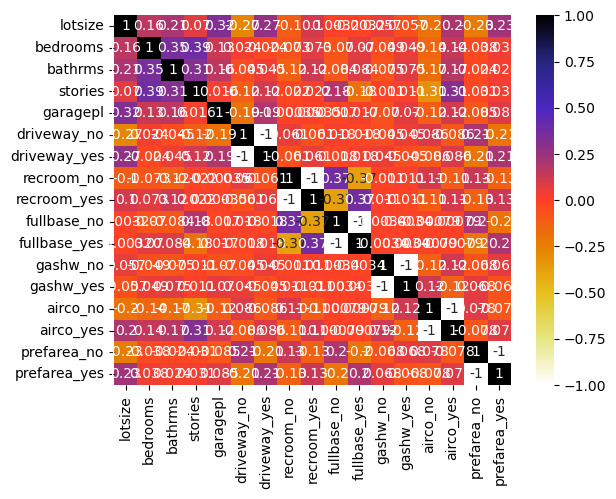

In [65]:
####  OR   ####
# Compute correlation matrix (Correlation among independent variables)
corr_matrix = X_train.corr()
corr_matrix
# plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap=plt.cm.CMRmap_r,annot=True)
# plt.show()

In [67]:
corr_matrix

,lotsize,bedrooms,bathrms,stories,garagepl,driveway_no,driveway_yes,recroom_no,recroom_yes,fullbase_no,fullbase_yes,gashw_no,gashw_yes,airco_no,airco_yes,prefarea_no,prefarea_yes
lotsize,1.000000,0.158686,0.208201,0.070338,0.324918,-0.272369,0.272369,-0.101845,0.101845,0.003192,-0.003192,0.056788,-0.056788,-0.203085,0.203085,-0.232208,0.232208
bedrooms,0.158686,1.000000,0.352592,0.387717,0.127878,0.024369,-0.024369,-0.072847,0.072847,-0.070387,0.070387,-0.048756,0.048756,-0.144808,0.144808,-0.038126,0.038126
bathrms,0.208201,0.352592,1.000000,0.314572,0.162227,-0.044573,0.044573,-0.117805,0.117805,-0.084180,0.084180,-0.074669,0.074669,-0.174370,0.174370,-0.023732,0.023732
stories,0.070338,0.387717,0.314572,1.000000,0.016188,-0.116674,0.116674,-0.021841,0.021841,0.183621,-0.183621,-0.010546,0.010546,-0.313530,0.313530,-0.031158,0.031158
garagepl,0.324918,0.127878,0.162227,0.016188,1.000000,-0.191237,0.191237,-0.000352,0.000352,-0.016584,0.016584,-0.069800,0.069800,-0.117020,0.117020,-0.084847,0.084847
driveway_no,-0.272369,0.024369,-0.044573,-0.116674,-0.191237,1.000000,-1.000000,0.061368,-0.061368,0.018306,-0.018306,-0.044667,0.044667,0.086493,-0.086493,0.208825,-0.208825
driveway_yes,0.272369,-0.024369,0.044573,0.116674,0.191237,-1.000000,1.000000,-0.061368,0.061368,-0.018306,0.018306,0.044667,-0.044667,-0.086493,0.086493,-0.208825,0.208825
recroom_no,-0.101845,-0.072847,-0.117805,-0.021841,-0.000352,0.061368,-0.061368,1.000000,-1.000000,0.372422,-0.372422,-0.010781,0.010781,0.105187,-0.105187,0.132539,-0.132539
recroom_yes,0.101845,0.072847,0.117805,0.021841,0.000352,-0.061368,0.061368,-1.000000,1.000000,-0.372422,0.372422,0.010781,-0.010781,-0.105187,0.105187,-0.132539,0.132539
fullbase_no,0.003192,-0.070387,-0.084180,0.183621,-0.016584,0.018306,-0.018306,0.372422,-0.372422,1.000000,-1.000000,0.003415,-0.003415,-0.000794,0.000794,0.202374,-0.202374


In [69]:
# Finding the correlated features
def correlation(dataset, threshold):
    corr_pairs = tuple() 
    all_pairs = []
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                print(abs(corr_matrix.iloc[i, j]))
                corr_pairs = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])  
                all_pairs.append(corr_pairs)
    return all_pairs  

In [70]:
# B) Which independent features have maximum correlation with target variable?
### They are most important
corr_feature_pairs = correlation(X_train, 0.35)   ### Here, 0.6 is a threshold
corr_feature_pairs

0.3525920935807792
0.38771693746711455
1.0000000000000002
0.9999999999999999
0.37242211353205235
0.3724221135320523
0.3724221135320525
0.3724221135320525
1.0
1.0
0.9999999999999999
1.0


[('bathrms', 'bedrooms', 0.3525920935807792),
 ('stories', 'bedrooms', 0.38771693746711455),
 ('driveway_yes', 'driveway_no', -1.0000000000000002),
 ('recroom_yes', 'recroom_no', -0.9999999999999999),
 ('fullbase_no', 'recroom_no', 0.37242211353205235),
 ('fullbase_no', 'recroom_yes', -0.3724221135320523),
 ('fullbase_yes', 'recroom_no', -0.3724221135320525),
 ('fullbase_yes', 'recroom_yes', 0.3724221135320525),
 ('fullbase_yes', 'fullbase_no', -1.0),
 ('gashw_yes', 'gashw_no', -1.0),
 ('airco_yes', 'airco_no', -0.9999999999999999),
 ('prefarea_yes', 'prefarea_no', -1.0)]

In [73]:
corr_features_to_drop = [ 'bedrooms','driveway_yes',  'recroom_yes', 
                         'fullbase_yes','gashw_no', 'airco_yes', 'prefarea_yes']

In [75]:
print(X_train.shape)
print(X_test.shape)

(424, 17)
(106, 17)


In [77]:
# Removing correlated features
print(X_train.shape)
print(X_test.shape)

X_train.drop(corr_features_to_drop,axis=1) # inplace=True)
X_test.drop(corr_features_to_drop,axis=1) # inplace=True)

print(X_train.shape)
print(X_test.shape)

(424, 17)
(106, 17)
(424, 17)
(106, 17)


##### c. Chi-squared for Feature Selection using SelectKBest with Score Functions

#### Correct score functions to be used are:

For regression: f_regression, mutual_info_regression

For classification: chi2, f_classif, mutual_info_classif

IMPORTANT NOTE:  
Beware not to use a regression scoring function with a classification problem, 
you will get useless results.

In [81]:
# Selecting k best features
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
from sklearn.feature_selection import mutual_info_regression   ## for Mutual Information

# ## For Classification Task
# from sklearn.feature_selection import mutual_info_classif   ## for Mutual Information
# from sklearn.feature_selection import chi2   ## for Chi-squared test
# from sklearn.feature_selection import f_classif   ## for ANOVA based test

In [83]:
#No we Will select the top k important features
sel_cols = SelectKBest(f_regression, k=4)

sel_cols.fit(X_train, y_train)

SelectKBest(k=4, score_func=<function f_regression at 0x00000223223AB240>)

In [85]:
X_train.columns

Index(['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl', 'driveway_no',
       'driveway_yes', 'recroom_no', 'recroom_yes', 'fullbase_no',
       'fullbase_yes', 'gashw_no', 'gashw_yes', 'airco_no', 'airco_yes',
       'prefarea_no', 'prefarea_yes'],
      dtype='object')

In [87]:
print(X_train.columns[ sel_cols.get_support() ])

sel_cols.get_support()

Index(['lotsize', 'bathrms', 'airco_no', 'airco_yes'], dtype='object')


array([ True, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False])

In [89]:
len(X_train.columns)

17

##### d. Feature Selection using SelectPercentile with Score Functions

In [39]:
#No we Will select the top k important features
sel_cols = SelectPercentile(f_regression, percentile=20)

sel_cols.fit(X_train, y_train)

SelectPercentile(percentile=20,
                 score_func=<function f_regression at 0x0000015C2FFC04C0>)

In [40]:
print(X_train.columns[sel_cols.get_support()])

sel_cols.get_support()

Index(['lotsize', 'bathrms', 'airco_no', 'airco_yes'], dtype='object')


array([ True, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False])

#### e. You may refer to Wrapper based Recursive feature elimination (RFE)

'''Recursive feature elimination (RFE): Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), 
the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller 
and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature
is obtained either through any specific attribute (such as coef_, feature_importances_) or callable. Then, the least important 
features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired 
number of features to select is eventually reached.'''

[Wrapper based Recursive feature elimination Description](https://scikit-learn.org/stable/modules/feature_selection.html)


[Recursive feature elimination Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

#### f. Ensemble based Tree Algorithm to get an idea of important Features

[ExtraTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#)


[SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X.shape          



(150, 4)

In [42]:
from sklearn.datasets import load_iris
from sklearn.tree import ExtraTreeClassifier
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y=True)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [43]:
clf = ExtraTreeClassifier()
clf = clf.fit(X, y)

In [44]:
clf.feature_importances_  

array([0.02      , 0.04515152, 0.20324675, 0.73160173])

In [45]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape  

(150, 1)

In [46]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [47]:
X_new

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

### Using Principle Component Analysis for Dimensionality Reduction

In [48]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train a classifier (Logistic Regression)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9111111111111111


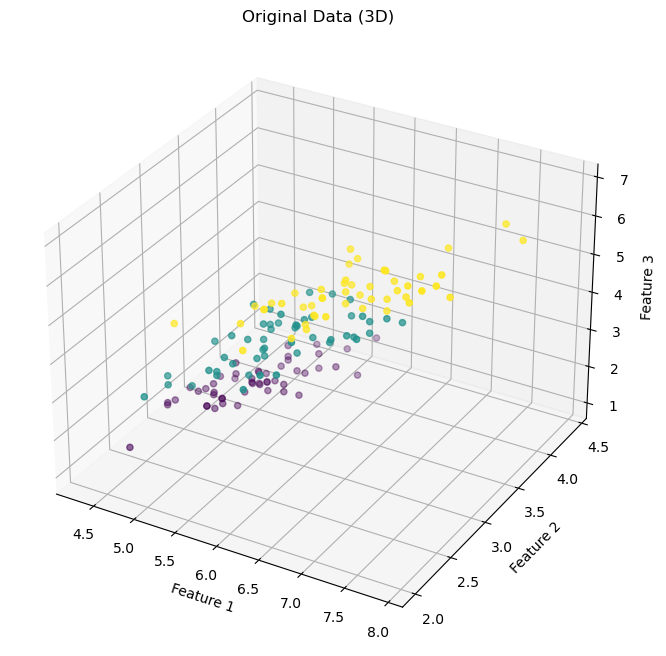

In [49]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Original Data (3D)')

plt.show()

Text(0.5, 1.0, 'Decision Boundary')

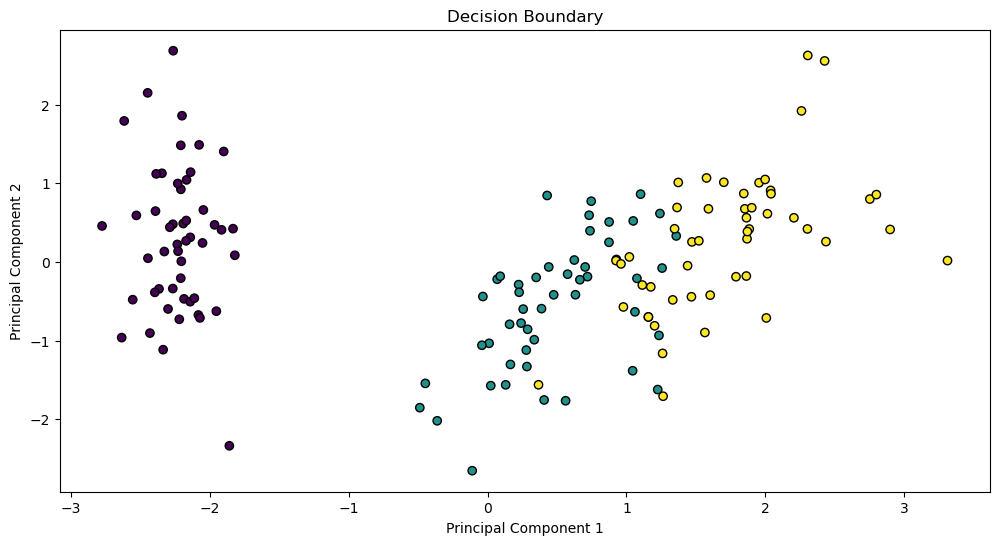

In [50]:
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap=plt.cm.viridis)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary')